In [130]:
# Imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load df

In [25]:
df = pd.read_csv("fremont_df.csv")
df

,Date,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0
...,...,...,...,...
111691,06/30/2025 07:00:00 PM,NaN,NaN,NaN
111692,06/30/2025 08:00:00 PM,NaN,NaN,NaN
111693,06/30/2025 09:00:00 PM,NaN,NaN,NaN
111694,06/30/2025 10:00:00 PM,NaN,NaN,NaN


### EDA

In [28]:
df.shape

(111696, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111696 entries, 0 to 111695
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Date                                                                111696 non-null  object 
 1   Fremont Bridge Sidewalks, south of N 34th St Total                  111596 non-null  float64
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  111596 non-null  float64
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  111596 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.4+ MB


In [41]:
df.describe()

,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
count,111596.000000,111596.000000,111596.000000
mean,106.383643,45.210778,61.172865
std,131.723155,58.717869,82.477519
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,60.000000,26.000000,33.000000
75%,146.000000,63.000000,81.000000
max,1097.000000,667.000000,850.000000


#### Convert column names

In [46]:
df.columns = ['Date', 'Total', 'West', 'East']
df

,Date,Total,West,East
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0
...,...,...,...,...
111691,06/30/2025 07:00:00 PM,NaN,NaN,NaN
111692,06/30/2025 08:00:00 PM,NaN,NaN,NaN
111693,06/30/2025 09:00:00 PM,NaN,NaN,NaN
111694,06/30/2025 10:00:00 PM,NaN,NaN,NaN


#### Check for nulls

In [51]:
df.isnull().sum()

Date       0
Total    100
West     100
East     100
dtype: int64

In [53]:
df[df.isnull().any(axis=1)]

,Date,Total,West,East
3805,03/10/2013 02:00:00 AM,NaN,NaN,NaN
6116,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6117,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12541,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21277,03/08/2015 02:00:00 AM,NaN,NaN,NaN
...,...,...,...,...
111691,06/30/2025 07:00:00 PM,NaN,NaN,NaN
111692,06/30/2025 08:00:00 PM,NaN,NaN,NaN
111693,06/30/2025 09:00:00 PM,NaN,NaN,NaN
111694,06/30/2025 10:00:00 PM,NaN,NaN,NaN


In [55]:
df = df.dropna()  # or df.fillna(0)
df

,Date,Total,West,East
0,10/02/2012 01:00:00 PM,55.0,7.0,48.0
1,10/02/2012 02:00:00 PM,130.0,55.0,75.0
2,10/02/2012 03:00:00 PM,152.0,81.0,71.0
3,10/02/2012 04:00:00 PM,278.0,167.0,111.0
4,10/02/2012 05:00:00 PM,563.0,393.0,170.0
...,...,...,...,...
111621,06/27/2025 08:00:00 PM,143.0,56.0,87.0
111622,06/27/2025 09:00:00 PM,71.0,27.0,44.0
111623,06/27/2025 10:00:00 PM,103.0,43.0,60.0
111624,06/27/2025 11:00:00 PM,56.0,16.0,40.0


#### Creating breakdown of columns for visualization

In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df

C:\Users\conor\AppData\Local\Temp\ipykernel_11920\66253117.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\conor\AppData\Local\Temp\ipykernel_11920\66253117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Total,West,East
0,2012-10-02 13:00:00,55.0,7.0,48.0
1,2012-10-02 14:00:00,130.0,55.0,75.0
2,2012-10-02 15:00:00,152.0,81.0,71.0
3,2012-10-02 16:00:00,278.0,167.0,111.0
4,2012-10-02 17:00:00,563.0,393.0,170.0
...,...,...,...,...
111621,2025-06-27 20:00:00,143.0,56.0,87.0
111622,2025-06-27 21:00:00,71.0,27.0,44.0
111623,2025-06-27 22:00:00,103.0,43.0,60.0
111624,2025-06-27 23:00:00,56.0,16.0,40.0


In [66]:
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()
df['Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
df

C:\Users\conor\AppData\Local\Temp\ipykernel_11920\675812998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Date'].dt.hour
C:\Users\conor\AppData\Local\Temp\ipykernel_11920\675812998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
C:\Users\conor\AppData\Local\Temp\ipykernel_11920\675812998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,Date,Total,West,East,Hour,Day,Month,Year,Weekday,Weekend
0,2012-10-02 13:00:00,55.0,7.0,48.0,13,2,10,2012,Tuesday,False
1,2012-10-02 14:00:00,130.0,55.0,75.0,14,2,10,2012,Tuesday,False
2,2012-10-02 15:00:00,152.0,81.0,71.0,15,2,10,2012,Tuesday,False
3,2012-10-02 16:00:00,278.0,167.0,111.0,16,2,10,2012,Tuesday,False
4,2012-10-02 17:00:00,563.0,393.0,170.0,17,2,10,2012,Tuesday,False
...,...,...,...,...,...,...,...,...,...,...
111621,2025-06-27 20:00:00,143.0,56.0,87.0,20,27,6,2025,Friday,False
111622,2025-06-27 21:00:00,71.0,27.0,44.0,21,27,6,2025,Friday,False
111623,2025-06-27 22:00:00,103.0,43.0,60.0,22,27,6,2025,Friday,False
111624,2025-06-27 23:00:00,56.0,16.0,40.0,23,27,6,2025,Friday,False


### Initial Visualization

In [92]:
# Group by Month & Year
monthly = df.groupby([df['Year'], df['Month']])['Total'].sum().reset_index()
monthly

,Year,Month,Total
0,2012,10,67633.0
1,2012,11,50647.0
2,2012,12,36369.0
3,2013,1,44884.0
4,2013,2,50027.0
...,...,...,...
148,2025,2,42025.0
149,2025,3,67570.0
150,2025,4,95742.0
151,2025,5,110266.0


In [96]:
# Create df column for plotting
monthly['Date'] = pd.to_datetime(monthly[['Year', 'Month']].assign(DAY=1))
monthly

,Year,Month,Total,Date
0,2012,10,67633.0,2012-10-01
1,2012,11,50647.0,2012-11-01
2,2012,12,36369.0,2012-12-01
3,2013,1,44884.0,2013-01-01
4,2013,2,50027.0,2013-02-01
...,...,...,...,...
148,2025,2,42025.0,2025-02-01
149,2025,3,67570.0,2025-03-01
150,2025,4,95742.0,2025-04-01
151,2025,5,110266.0,2025-05-01


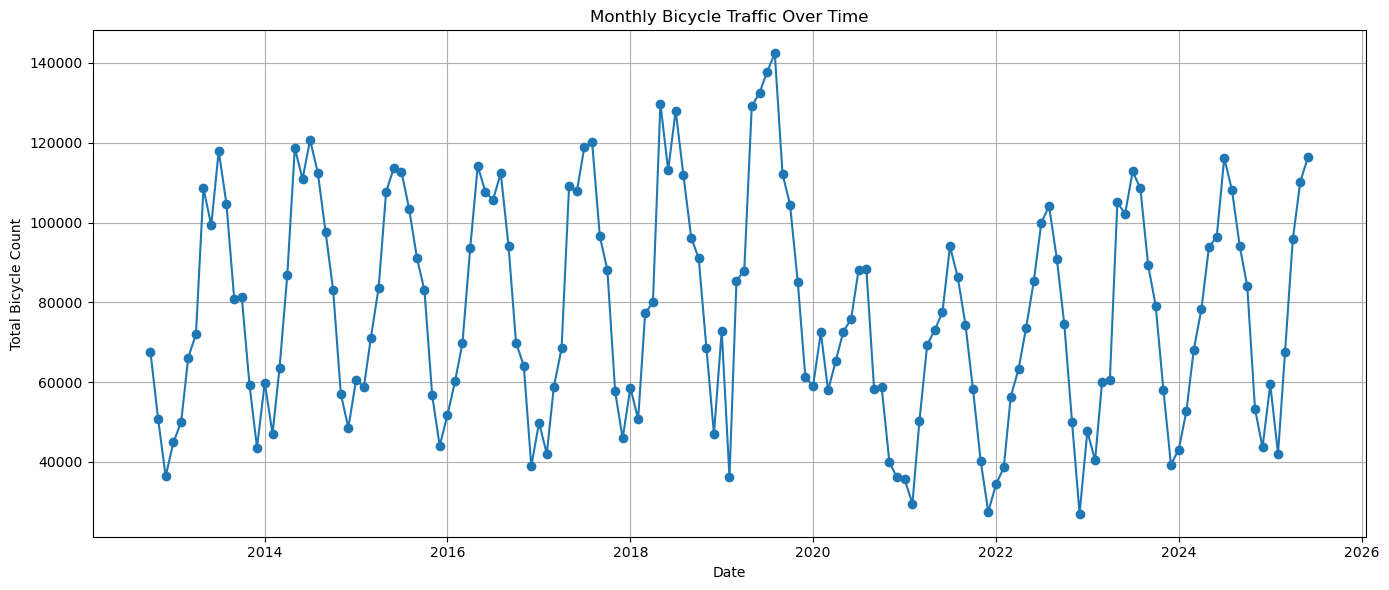

In [106]:
# Plot of monthly bucycle traffic
plt.figure(figsize=(14,6))
plt.plot(monthly['Date'], monthly['Total'], marker='o', linestyle='-')
plt.title('Monthly Bicycle Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bicycle Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Weekday vs weekend Breakdown

In [111]:
# Group by Weekday
weekday_totals = df.groupby('Weekday')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_totals

Weekday
Monday       1843564.0
Tuesday      2075623.0
Wednesday    2068976.0
Thursday     1971859.0
Friday       1742119.0
Saturday     1122769.0
Sunday       1047079.0
Name: Total, dtype: float64

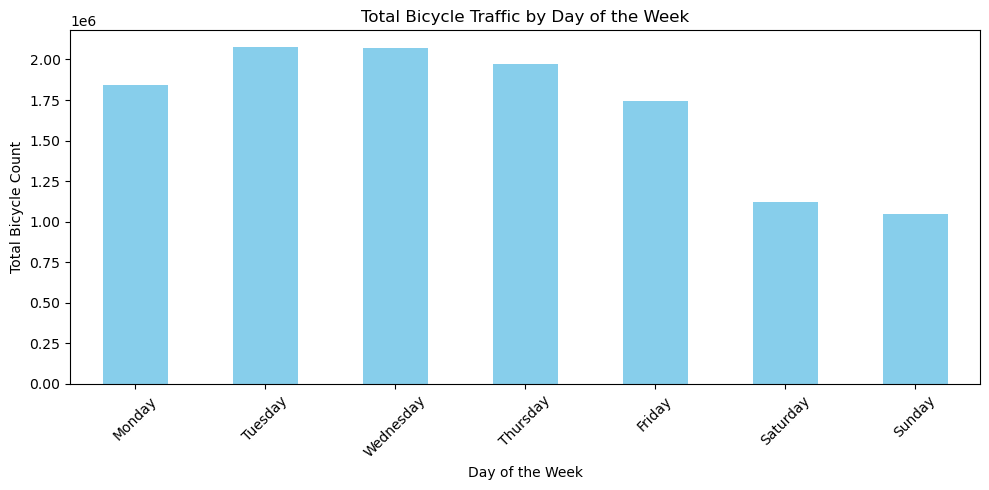

In [113]:
# Plot
plt.figure(figsize=(10,5))
weekday_totals.plot(kind='bar', color='skyblue')
plt.title('Total Bicycle Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bicycle Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Hourly Directional Trends [East vs West]

In [116]:
# Group by hour, average counts
hourly = df.groupby('Hour')[['East', 'West']].mean()
hourly

,East,West
Hour,,
0,5.738981,4.381423
1,3.007527,2.461505
2,2.014233,1.594781
3,1.440645,1.217849
4,3.406022,2.696559
5,11.517849,10.688817
6,40.630323,35.945591
7,101.261290,88.807527
8,151.664301,122.342151


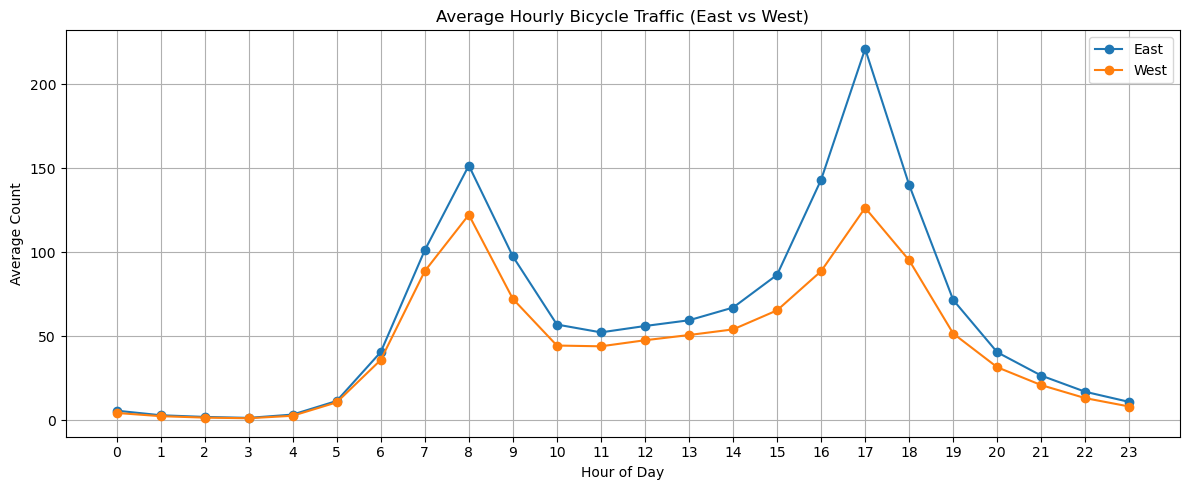

In [118]:
# Plot
hourly.plot(figsize=(12,5), marker='o')
plt.title('Average Hourly Bicycle Traffic (East vs West)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

#### Hourly Trends by Weekday vs Weekend

In [120]:
# Create a 'WeekType' column
df['WeekType'] = df['Weekend'].map({True: 'Weekend', False: 'Weekday'})

C:\Users\conor\AppData\Local\Temp\ipykernel_11920\2885999346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WeekType'] = df['Weekend'].map({True: 'Weekend', False: 'Weekday'})


In [122]:
# Group by WeekType and Hour, then average total counts
hourly_trend = df.groupby(['WeekType', 'Hour'])[['East', 'West']].mean()
hourly_trend

East        West
WeekType Hour                        
Weekday  0       4.657134    3.492474
         1       2.274232    1.812161
         2       1.596629    1.177002
         3       1.273931    1.166165
         4       3.930163    3.228176
         5      14.592414   13.724262
         6      53.098134   47.409091
         7     134.670379  118.579470
         8     199.465683  160.326008
         9     118.547124   85.187895
         10     56.371274   42.149353
         11     44.659843   36.731186
         12     47.036725   39.133052
         13     50.281156   41.710114
         14     59.947939   45.368342
         15     88.170930   61.958170
         16    170.054168   97.385796
         17    284.478483  155.327716
         18    176.792356  116.683720
         19     85.406861   60.733373
         20     47.155582   36.253686
         21     29.104123   23.700271
         22     18.791454   14.430334
         23     11.530846    8.628649
Weekend  0       8.443190    6.603461
         1       4.841867    4.085843
         2       3.069202    2.650190
         3       1.857681    1.347139
         4       2.094880    1.366717
         5       3.826807    3.095633
         6       9.442018    7.269578
         7      17.688253   14.332831
         8      32.088855   27.325301
         9      45.092620   39.987199
         10     58.582831   50.370482
         11     71.554217   62.335090
         12     78.873494   68.960843
         13     82.719127   73.396084
         14     85.005271   75.961596
         15     82.652108   74.189759
         16     75.989458   67.202560
         17     62.665663   54.267319
         18     48.143072   41.591867
         19     37.138554   28.871235
         20     23.793675   19.866717
         21     20.330572   14.020331
         22     12.402108   10.062500
         23      9.390813    7.119729

In [124]:
# Sum East + West to get total sidewalk use
hourly_trend['Total'] = hourly_trend['East'] + hourly_trend['West']
hourly_trend['Total']

WeekType  Hour
Weekday   0         8.149609
          1         4.086394
          2         2.773630
          3         2.440096
          4         7.158338
          5        28.316677
          6       100.507225
          7       253.249849
          8       359.791692
          9       203.735020
          10       98.520626
          11       81.391030
          12       86.169777
          13       91.991270
          14      105.316280
          15      150.129100
          16      267.439964
          17      439.806199
          18      293.476076
          19      146.140235
          20       83.409269
          21       52.804394
          22       33.221788
          23       20.159494
Weekend   0        15.046652
          1         8.927711
          2         5.719392
          3         3.204819
          4         3.461596
          5         6.922440
          6        16.711596
          7        32.021084
          8        59.414157
          9        85.079819

In [126]:
# Reset index for plotting
hourly_trend = hourly_trend.reset_index()
hourly_trend

,WeekType,Hour,East,West,Total
0,Weekday,0,4.657134,3.492474,8.149609
1,Weekday,1,2.274232,1.812161,4.086394
2,Weekday,2,1.596629,1.177002,2.773630
3,Weekday,3,1.273931,1.166165,2.440096
4,Weekday,4,3.930163,3.228176,7.158338
5,Weekday,5,14.592414,13.724262,28.316677
6,Weekday,6,53.098134,47.409091,100.507225
7,Weekday,7,134.670379,118.579470,253.249849
8,Weekday,8,199.465683,160.326008,359.791692
9,Weekday,9,118.547124,85.187895,203.735020


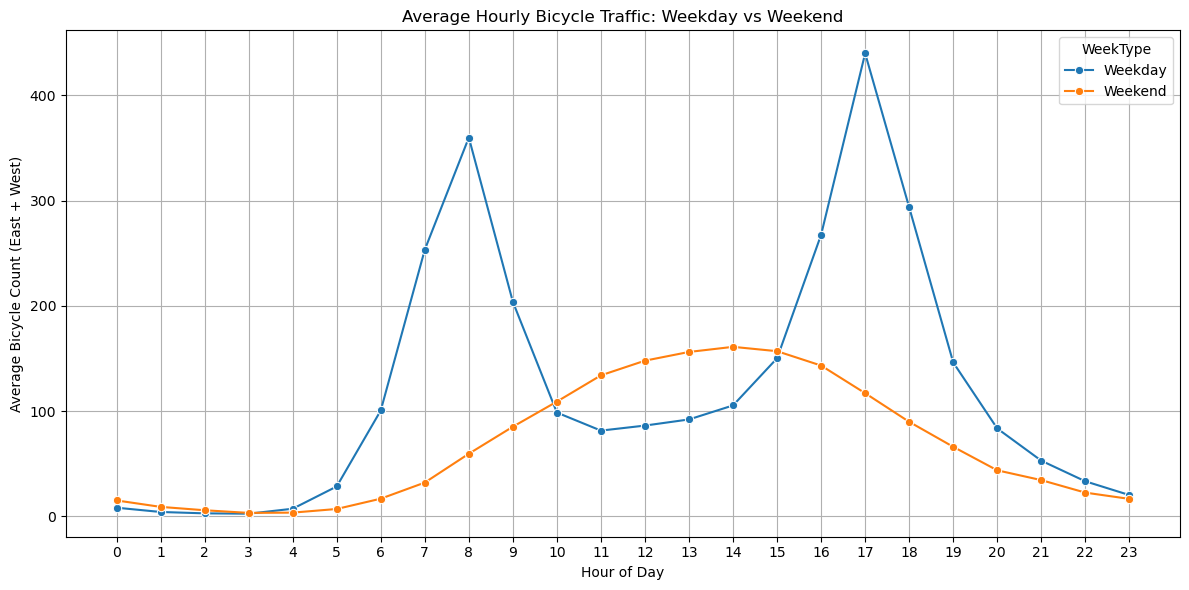

In [132]:
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_trend, x='Hour', y='Total', hue='WeekType', marker='o')
plt.title('Average Hourly Bicycle Traffic: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bicycle Count (East + West)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#### YoY trend

In [144]:
yearly_counts = df.groupby('Year')['Total'].sum().reset_index()
yearly_counts

,Year,Total
0,2012,154649.0
1,2013,928279.0
2,2014,1006196.0
3,2015,986502.0
4,2016,982470.0
5,2017,963135.0
6,2018,1051880.0
7,2019,1187146.0
8,2020,772593.0
9,2021,715630.0


C:\Users\conor\AppData\Local\Temp\ipykernel_11920\2137898159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_counts, x='Year', y='Total', palette='Blues')


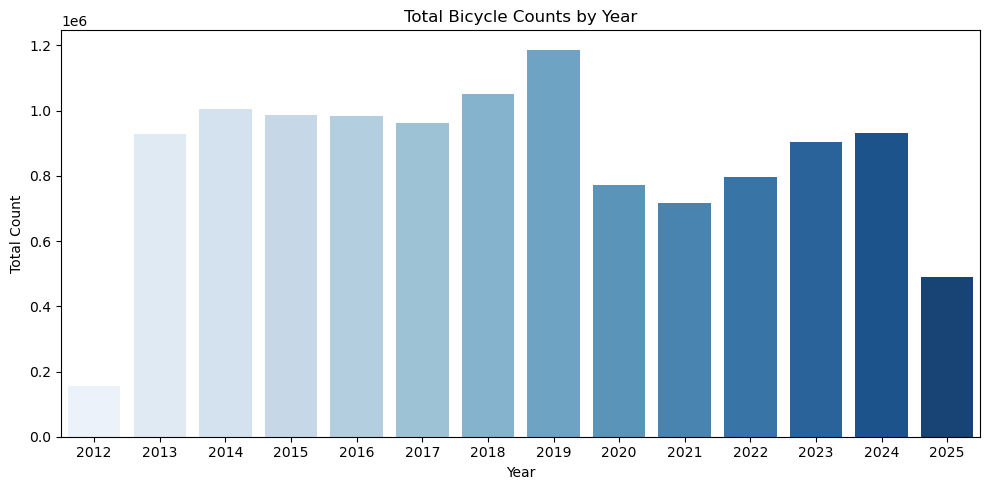

In [146]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=yearly_counts, x='Year', y='Total', palette='Blues')
plt.title('Total Bicycle Counts by Year')
plt.ylabel('Total Count')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#### Seasonal Variation

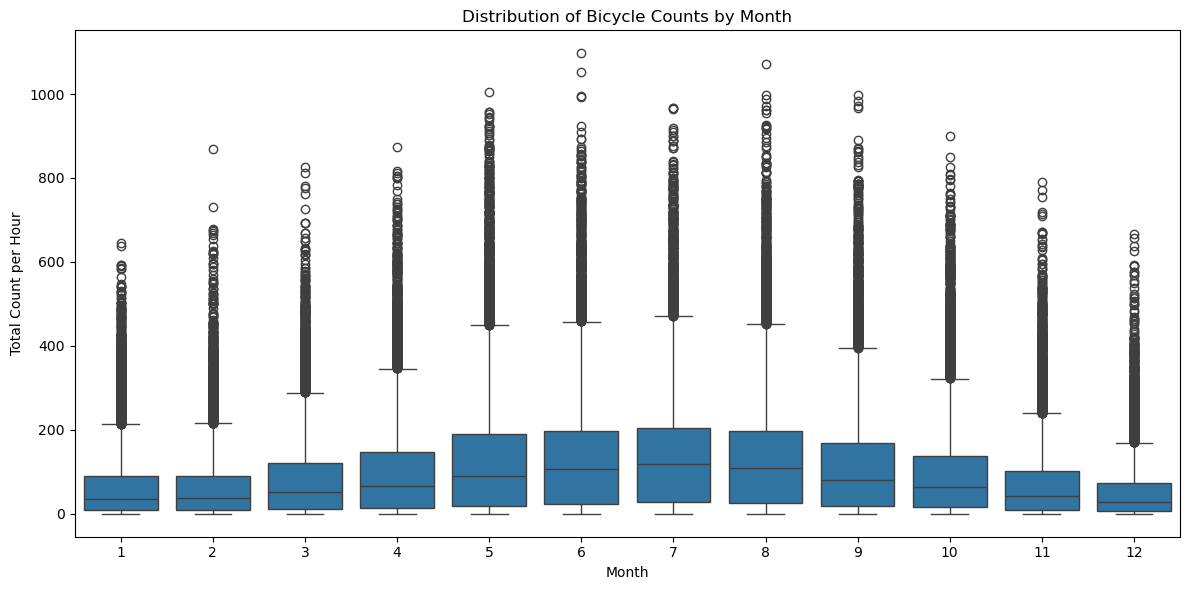

In [148]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Month', y='Total')
plt.title('Distribution of Bicycle Counts by Month')
plt.xlabel('Month')
plt.ylabel('Total Count per Hour')
plt.tight_layout()
plt.show()

In [ ]:
#### Heatmap: Average Hour vs Day

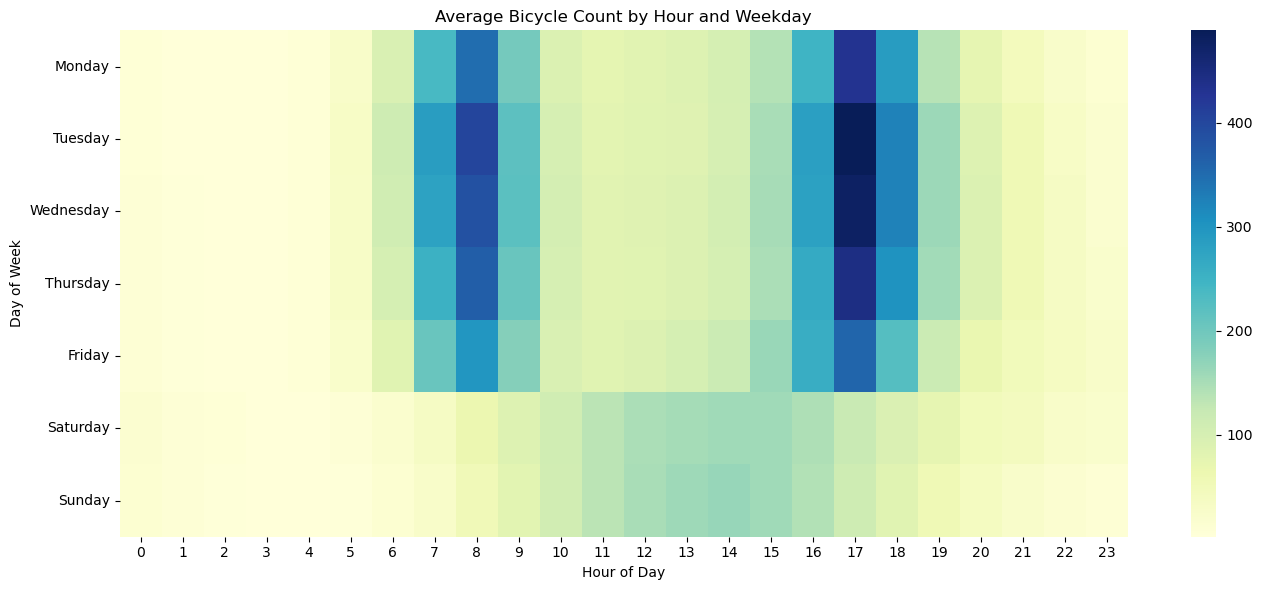

In [151]:
heatmap_data = df.pivot_table(index='Weekday', columns='Hour', values='Total', aggfunc='mean')
# Order weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Average Bicycle Count by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
